# FEATURE SELECTION

---

### Why we need feature selection ?

Curse of Dimensionality - As the number of features increases, so does the model performance. But, after a certain threshold number of features, the model performance starts decreasing.

Types of features-
- Irrelevent features - For predicting salary, we have features - temperature, humidity
- Redundant features - For predicting disease, we have features - height in cm, height in m, height in feet

### To deal with curse of dimensionality

- Feature selection - Select top 50-75 features that explain your data in the best way (Selecting subset of the features)
- Feature extraction - PCA

### Feature Selection

- Features - a, b, c, d, e, f, g,....., z
- Selected features (5) - a, z, g, s, h

### Feature extraction
- Features - a, b, c, d, e, ...., z
- Selected features - azd, gh, d, we, r
- One technique of feature extraction is PCA

### Types of Feature Selection

3 types of feature selction techniques
- Filter method
- Wrapper method
- Embedded method

#### 1. Filter methods
- Filter out the relevent features
- Checks the relevence of each feature with the target variable
- If any feature is relevent take it, otherwise reject it
- Select best subset - use statistical tests like Chi-Squared test, Anova test, Correlation coefficient
- Correlation coefficent - positive correlation and negative correlation

#### 2. Wrapper methods
- Forward selection
- Backward elimination

##### Forward selection
- Take feature 'a' and compute the model accuracy. 
- Now take 'a, b' and check performance, if it has increased performance, take this feature, otherwise reject it
- Continue with 'a,b,c', and check performance and accept or reject it

##### Backward selection
Intially a,b,c,d,e
- Keep all the features and train a model
- Use statistical tests(Chi2, Anova, corr) to check which variable is least important and remove it ( p <= 0.05, then feature is useful ). Say, e is least important.
- Now train model again with features a,b,c,d and continue this procedure

##### Wrapper methods are not used generally used as we have to train the model again and again, which takes time

#### 3. Embedded methods
- Similar to wrapper methods
- Learns features while building the model
- Like, take b, train the model
- Then take ac as feature and train the model
- Like this way, take all permutations and combinations and select model which performs best
- One example is Decision Tree

## Univariate Selection

#### Dataset
Mobile Price Classification dataset 
- 21 features
- Not all features are important
- Predict the price range of the mobile
- 0 - low cost, 1 - medium cost, 2 - high cost, 3 - very high cost

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Datasets/Feature_Selection/train.csv')

In [6]:
df.shape

(2000, 21)

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
plt.style.use('seaborn')

In [11]:
# feature selection from sklearn
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [14]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

## 1. SelectKBest

In [16]:
best_features = SelectKBest(score_func=chi2, k=10)

In [18]:
fit = best_features.fit(X, y)

In [19]:
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [20]:
dfScores = pd.DataFrame(fit.scores_)

In [21]:
dfScores.head()

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166


In [22]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [23]:
dfColumns = pd.DataFrame(df.columns)

In [24]:
dfColumns.head()

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [29]:
dfFeatureScore = pd.concat([dfColumns, dfScores], axis=1)

In [31]:
dfFeatureScore.columns = ['feature', 'score']

In [32]:
dfFeatureScore.head()

,feature,score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


In [36]:
dfFeatureScore = dfFeatureScore.sort_values(by='score', ascending=False)

In [37]:
dfFeatureScore.head()

,feature,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863


##### Now we can take the top 10 features and train our model

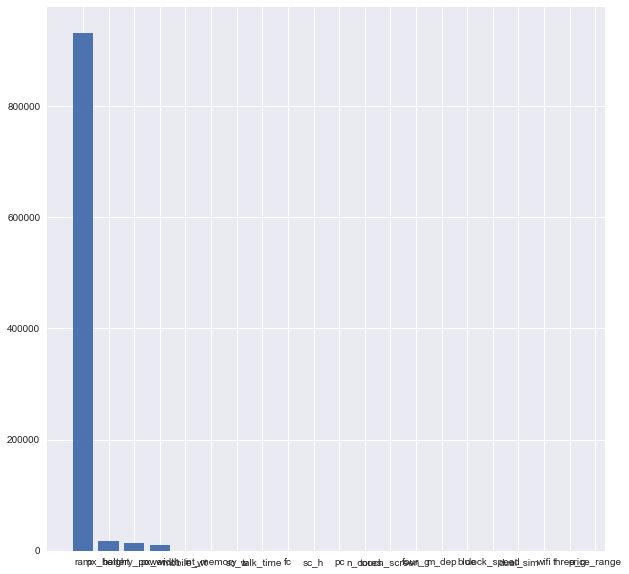

In [39]:
plt.figure(figsize=(10, 10))
plt.bar(dfFeatureScore['feature'], dfFeatureScore['score'])
plt.show()

## 2. Feature Importance

Use decision tree based model from sklearn and there is a property called feature importance to get it's importance

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier()

In [42]:
model.fit(X, y)

RandomForestClassifier()

In [43]:
model.feature_importances_

array([0.07440269, 0.00665701, 0.02603043, 0.00650737, 0.02538079,
       0.0062985 , 0.03540224, 0.02435834, 0.03897861, 0.0221374 ,
       0.02921619, 0.05553643, 0.05619546, 0.48880371, 0.02808868,
       0.02788891, 0.02973224, 0.00530303, 0.00665385, 0.0064281 ])

First feature is contributing 7%, second is 0.6% etc.

In [45]:
dfImportance = pd.DataFrame(model.feature_importances_, index=X.columns)

In [46]:
dfImportance.head()

,0
battery_power,0.074403
blue,0.006657
clock_speed,0.026030
dual_sim,0.006507
fc,0.025381


In [47]:
dfImportance.columns = ['Importance']
featureImportance = dfImportance.sort_values(by='Importance', ascending=False)

In [49]:
featureImportance

,Importance
ram,0.488804
battery_power,0.074403
px_width,0.056195
px_height,0.055536
mobile_wt,0.038979
int_memory,0.035402
talk_time,0.029732
pc,0.029216
sc_h,0.028089
sc_w,0.027889


<BarContainer object of 20 artists>

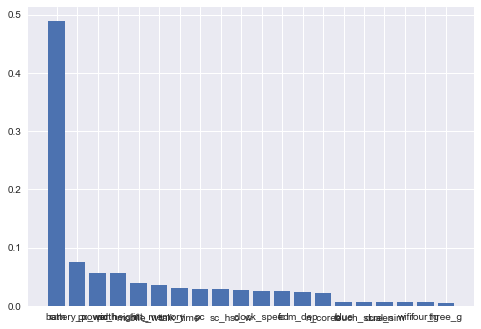

In [50]:
plt.bar(featureImportance.index, featureImportance['Importance'])

## 3. Correlation based method

##### Check correlation of each variable with others

In [51]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [52]:
data_corr = df.corr()

In [53]:
data_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


##### We need to get those features that are highly correlated with price range

#### Create a heatmap

In [54]:
import seaborn as sns

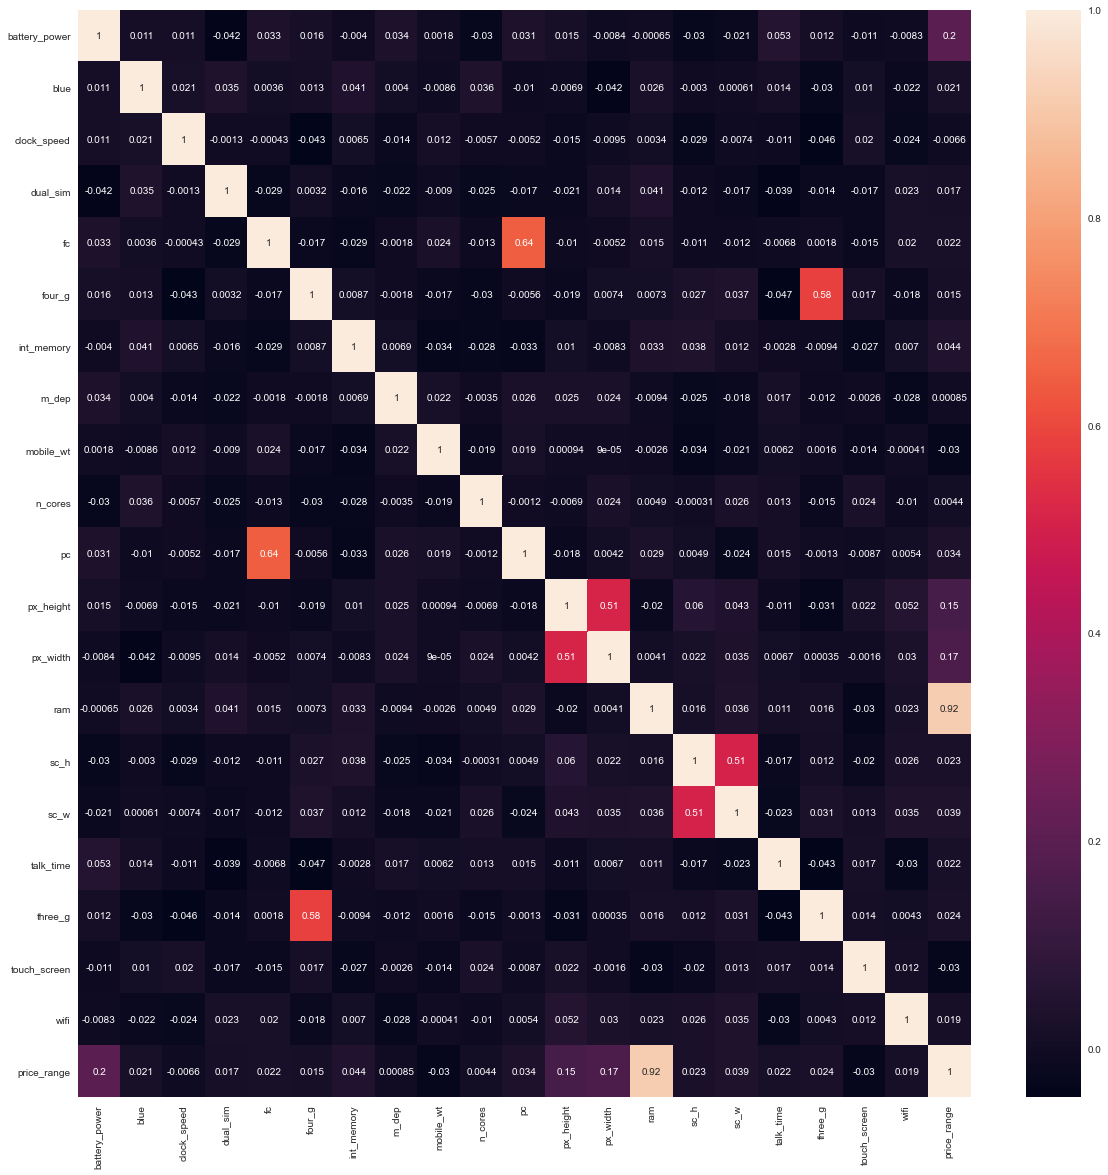

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(data_corr, annot=True)
plt.show()

##### Here, we can see RAM has highest correlation with price range

## Conclusion

Either choose one of them, or can take a combination of them by taking feature importance from all three methods to conclude. If two methods are showing that a feature is important, then take that feature

## Check the model performance

Checking how effective it is to do feature selection and then train a model

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [59]:
rfc = RandomForestClassifier()

In [60]:
# cv - how many times to do the training and testing, will give
# score for 10 times, as we have done testing for 10 times
scores = cross_val_score(rfc, X, y, cv=10)

In [61]:
scores

array([0.89 , 0.855, 0.91 , 0.86 , 0.895, 0.895, 0.885, 0.87 , 0.85 ,
       0.88 ])

In [62]:
scores.mean()

0.8790000000000001

In [66]:
ten_features = dfFeatureScore.head(10)['feature']

In [67]:
ten_features

13              ram
11        px_height
0     battery_power
12         px_width
8         mobile_wt
6        int_memory
15             sc_w
16        talk_time
4                fc
14             sc_h
Name: feature, dtype: object

In [70]:
X[ten_features]

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


In [71]:
scores_after_fs = cross_val_score(rfc, X[ten_features], y, cv=10)

In [72]:
scores_after_fs

array([0.9  , 0.905, 0.93 , 0.91 , 0.905, 0.92 , 0.905, 0.9  , 0.88 ,
       0.925])

In [73]:
scores_after_fs.mean()

0.9080000000000001

#### Accuracy increased from 88% to 90% after feature selection

In [76]:
rfc_10 = RandomForestClassifier(max_depth=10)
scores = cross_val_score(rfc_10, X, y, cv=10)
print('Without Feature Selection: ', scores.mean())

scores_after_fs = cross_val_score(rfc_10, X[ten_features], y, cv=10)
print('Without Feature Selection: ', scores_after_fs.mean())

Without Feature Selection:  0.8855000000000001
Without Feature Selection:  0.8985000000000001
